In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import decoupler as dc
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from itertools import combinations
import anndata
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

import plotting_functions as pf

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
plate_palette = sns.color_palette("husl", n_colors=3)
sex_palette = ['hotpink','dodgerblue']
geno_palette = ['#DA9CC1', '#F4C245', '#C0BFBF', '#55AF5B', '#4F6EAF', '#52A5DB', '#D83026', '#683C91']


# QC plotting - 200 UMI merged adata

In [2]:
adata = sc.read("../IGVF_analysis/preprocessed_tissues/Heartpreprocessed.h5ad")


In [3]:
adata.layers['raw_counts'] = adata.X.copy()


In [4]:
adata

AnnData object with n_obs × n_vars = 1624987 × 56953
    obs: 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'subpool', 'bc1_well', 'bc2_well', 'bc3_well', 'Mouse_Tissue_ID', 'alias_tissue1', 'alias_tissue2', 'alias_tissue3', 'alias_tissue4', 'plate', 'Protocol', 'Chemistry', 'well_type', 'Row', 'Column', 'Genotype', 'Notes', 'Multiplexed_sample1', 'Multiplexed_sample2', 'SampleType', 'Tissue', 'Tissue_ID', 'Tissue1_ontology_id', 'Tissue2_ontology_id', 'Sex', 'Replicate', 'DOB', 'Age_weeks', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'Dissector', 'Tissue_weight_mg', 'mult_genotype_1', 'mult_genotype_2', 'mult_genotype', 'n_counts', 'doublet_scores', 'batch'
    var: 'gene_name'
    layers: 'raw_counts'

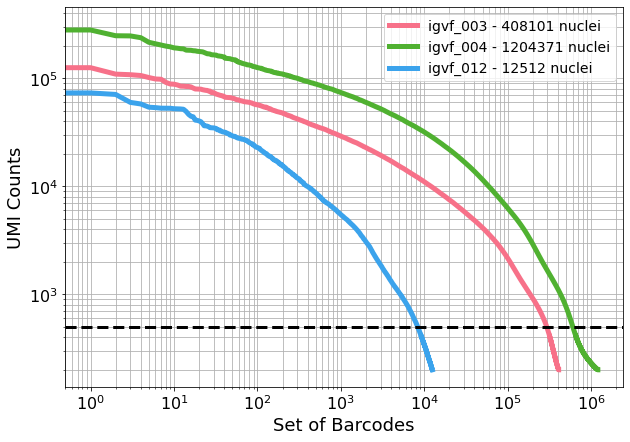

In [5]:
pf.plot_knee(adata, cutoff=500, category_column='plate', figsize=(10, 7))
plt.show()

In [6]:
# set var names to be gene names, not gene ID
adata.var_names  = adata.var['gene_name']
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


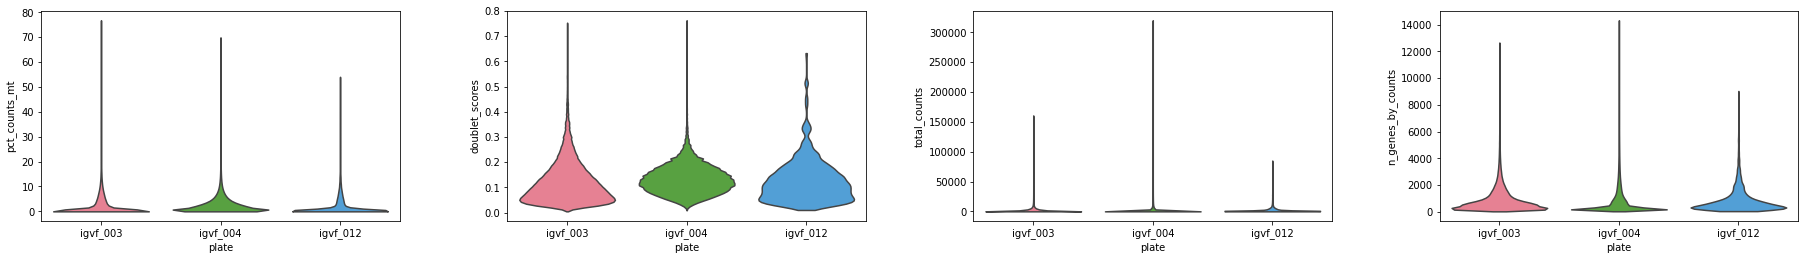

In [7]:
plate_palette = sns.color_palette("husl", n_colors=3)

sc.pl.violin(adata, ['pct_counts_mt', 'doublet_scores', 'total_counts', 'n_genes_by_counts'],
             groupby = "plate", palette = plate_palette,
             jitter=0.4, multi_panel=True, size=0)

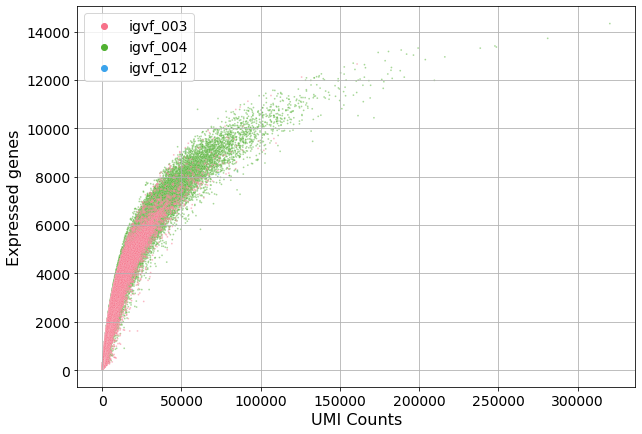

In [8]:
pf.plot_genes_by_counts(adata, category_column='plate', figsize=(10, 7))
plt.show()

In [9]:
adatas = adata[(adata.obs['total_counts'] < 10000) & (adata.obs['n_genes_by_counts'] < 2000), :]


/opt/apps/python/3.8.0/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


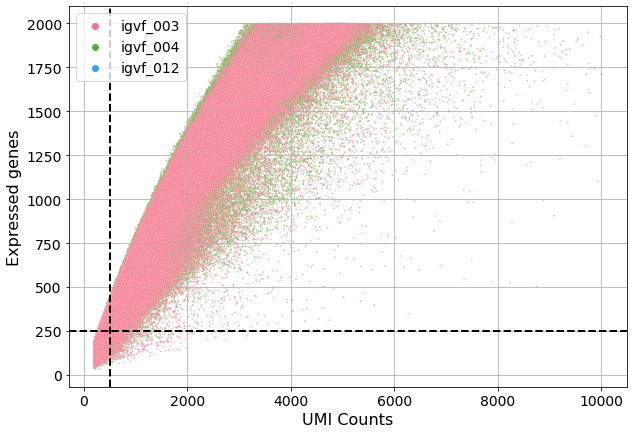

In [11]:
pf.plot_genes_by_counts(adatas, category_column='plate', figsize=(10, 7))

plt.axvline(x=500, color='k', linestyle='--', linewidth=2)
plt.axhline(y=250, color='k', linestyle='--', linewidth=2)

plt.show()

In [12]:
adatas[(adatas.obs['total_counts'] > 500) & (adatas.obs['n_genes_by_counts'] < 250), :]


View of AnnData object with n_obs × n_vars = 4158 × 56953
    obs: 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'subpool', 'bc1_well', 'bc2_well', 'bc3_well', 'Mouse_Tissue_ID', 'alias_tissue1', 'alias_tissue2', 'alias_tissue3', 'alias_tissue4', 'plate', 'Protocol', 'Chemistry', 'well_type', 'Row', 'Column', 'Genotype', 'Notes', 'Multiplexed_sample1', 'Multiplexed_sample2', 'SampleType', 'Tissue', 'Tissue_ID', 'Tissue1_ontology_id', 'Tissue2_ontology_id', 'Sex', 'Replicate', 'DOB', 'Age_weeks', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'Dissector', 'Tissue_weight_mg', 'mult_genotype_1', 'mult_genotype_2', 'mult_genotype', 'n_counts', 'doublet_scores', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'raw_counts'

# QC plotting - filtered data
500 UMI, 250 genes, 1% mito, 0.25 doublet score


In [3]:
adata = sc.read("../IGVF_analysis/tissue_processed_500umi/Heart_processed.h5ad")


In [48]:
adata.layers

Layers with keys: raw_counts

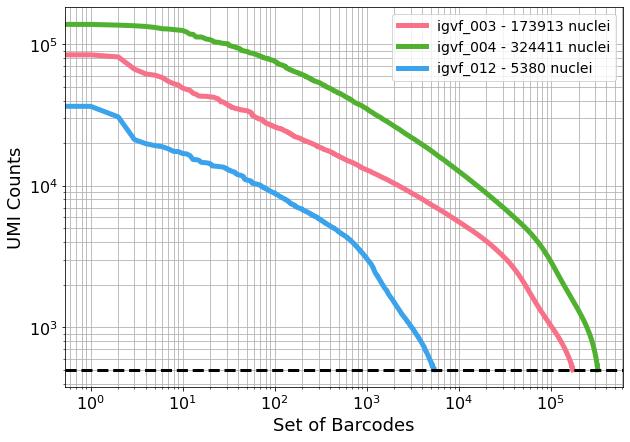

In [49]:
pf.plot_knee(adata, cutoff=500, category_column='plate', figsize=(10, 7))
plt.show()

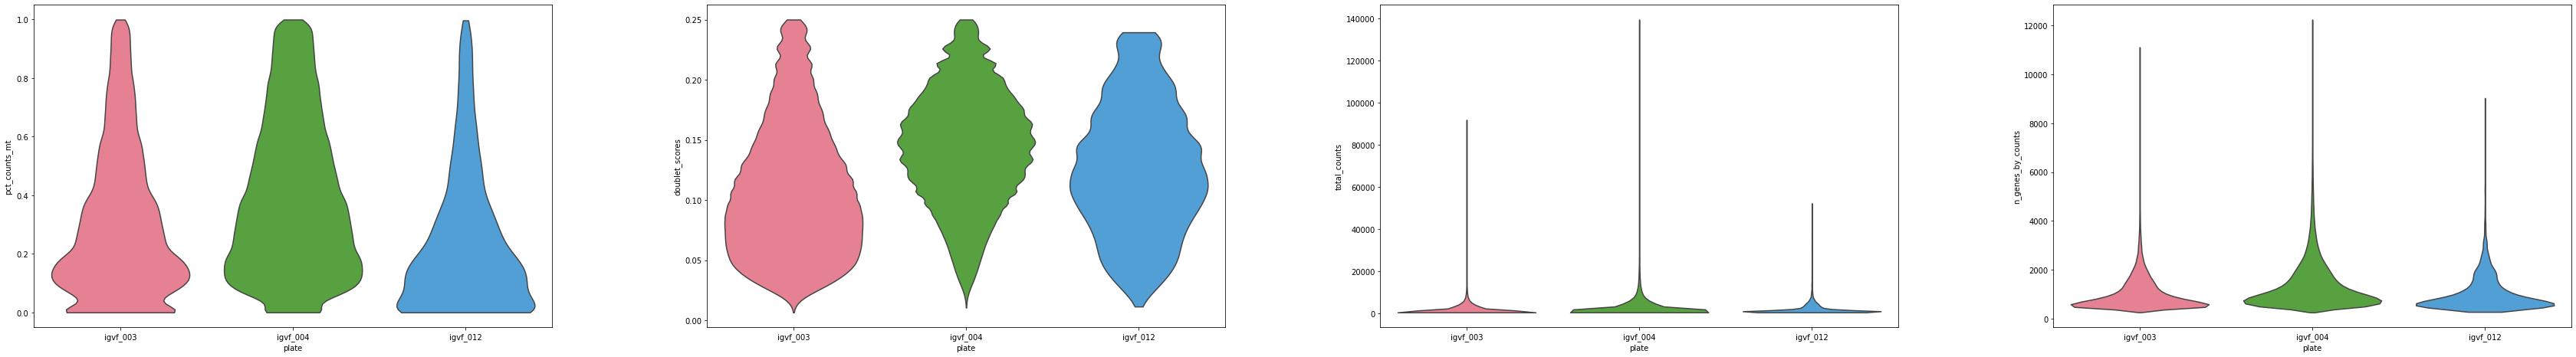

In [50]:
sc.pl.violin(adata, ['pct_counts_mt', 'doublet_scores', 'total_counts', 'n_genes_by_counts'],
             groupby = "plate", palette = plate_palette,
             jitter=0.4, multi_panel=True, size=0)

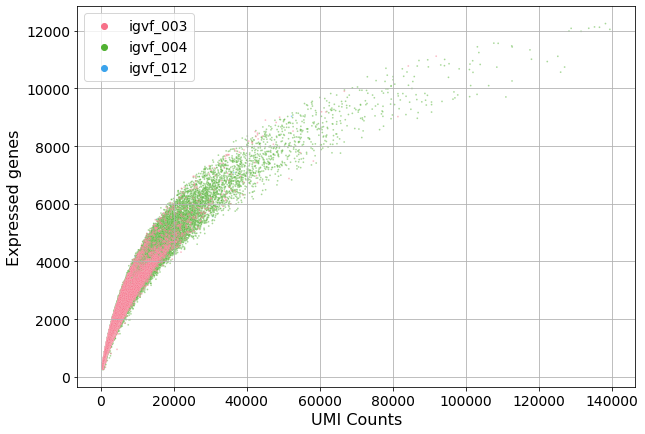

In [51]:
pf.plot_genes_by_counts(adata, category_column='plate', figsize=(10, 7))
plt.show()

In [4]:
print(adata.obs['Genotype'].value_counts())

adata = adata[adata.obs['Genotype'] != "tie",:]

print(adata.obs['Genotype'].value_counts())

Genotype
NZOJ      84060
129S1J    75037
PWKJ      72820
CASTJ     65301
B6J       61956
NODJ      51796
AJ        46583
WSBJ      46112
tie          42
Name: count, dtype: int64
Genotype
NZOJ      84060
129S1J    75037
PWKJ      72820
CASTJ     65301
B6J       61956
NODJ      51796
AJ        46583
WSBJ      46112
Name: count, dtype: int64


# Check clustering
Plate, sex, genotype

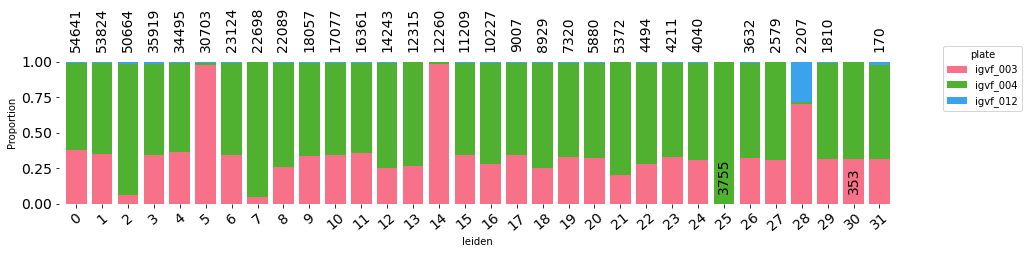

In [53]:
pf.stacked_barplot_proportions(adata.obs, 
                            'leiden', 'plate',
                            flip=False, fsize = (15,3), 
                            annotations = True)


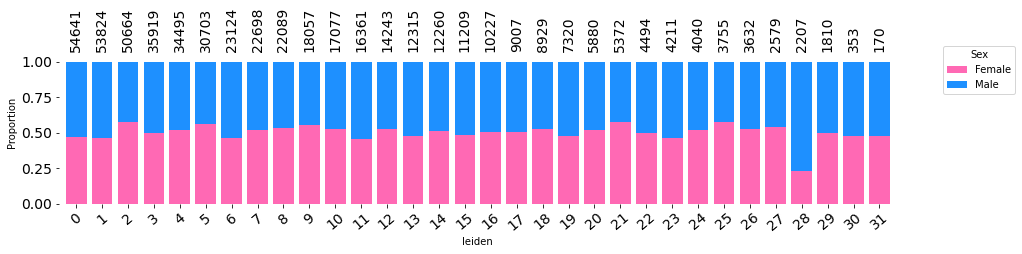

In [54]:
pf.stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Sex',
                            flip=False, fsize = (15,3), 
                            annotations = True)


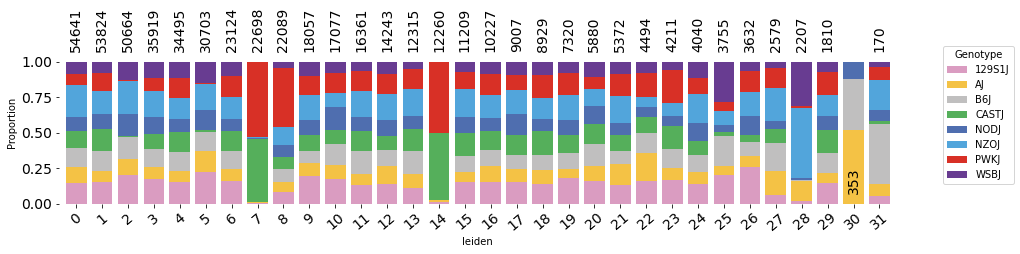

In [55]:
pf.stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Genotype',
                            flip=False, fsize = (15,3), 
                            annotations = True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/apps/python/3.8.0/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


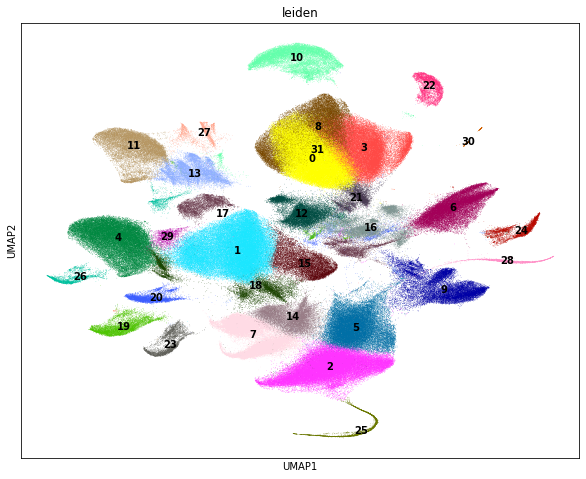

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


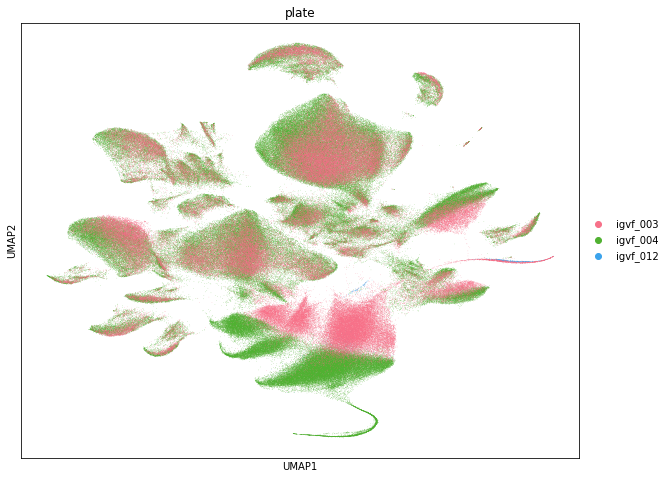

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


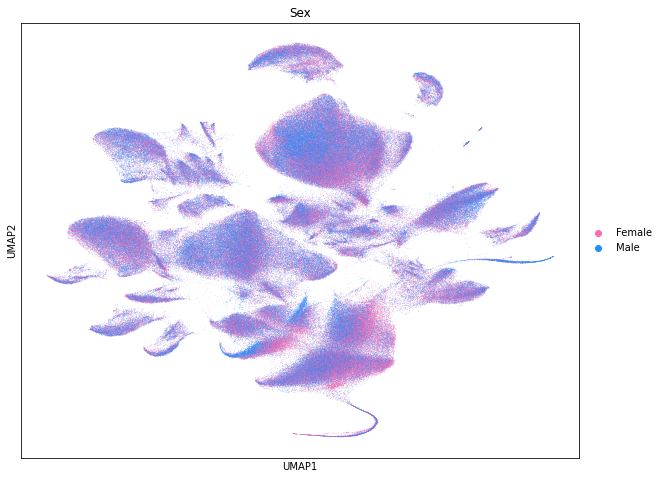

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


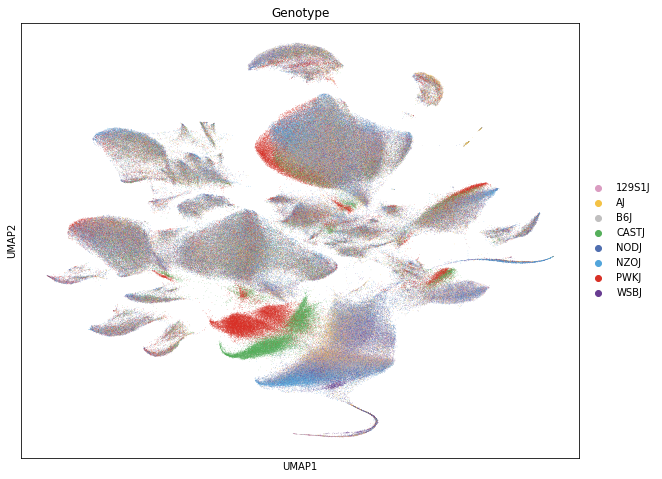

In [56]:
plt.rcParams['figure.figsize'] = (10, 8)

sc.pl.umap(adata, color=['leiden'], size=1, legend_loc = 'on data')

sc.pl.umap(adata, color=['plate'], size = 0.8, palette = plate_palette)

sc.pl.umap(adata, color=['Sex'], size = 0.8, palette = sex_palette)

sc.pl.umap(adata, color=['Genotype'], size = 0.8, palette = geno_palette)



# Check marker gene expression

In [57]:
marker_genes_dict = {
    "Adipocyte": ["Adipoq","Pnpla2"],
    "Endothelial": ["Flt1","Pecam1","Tie1","Kdr","Tek","Eng","Emcn"],
    "Lymphatic_endothelial": ["Prox1","Lyve1","Flt4"],
    "Endocardial": ["Nrg2","Sox17"],
    "Fibroblast": ["Mgp","Dcn","Col1a1","Pdgfra","Ddr2"],
    "Macrophage": ["Mrc1","Adgre1","Itgam","Fcgr1","Cx3cr1","F13a1"],
    "Lymphocyte": ["Ms4a1","Ikzf1","Ikzf3","Bcl11a","Themis","Il7r"],
    "Smooth_muscle1": ["Myh11","Mylk"],
    "Smooth_muscle2": ["Acta2","Tagln","Eln","Myl6","Myl9"],
    "Pericyte": ["Pdgfrb","P2ry14","Abcc9"],
    "Schwann": ["Cadm2","Sox10","Postn","Plp1"],
    "Epicardial": ["Abi1","Wt1","Aldh1a2"],
    "Epithelial": ["Cdh1","Klf5"],
    "Cardiomyocyte_atrial": ['Myl7','Myl4','Nppa'],
    "Cardiomyocyte": ["Ryr2","Ttn","Actc1","Tnnt2","Tnnc1","Mybpc3","Myh6","Myh7","Atp2a2","Gata4","Mef2a","Mef2d"],
    "Cycling": ["Top2a","Mki67"],
    "Neuron": ["Snap25","Slc17a7"],
    "Liver": ["Alb", "Cyp1a2"],

}



In [58]:
adata.var_names  = adata.var['gene_name']


categories: 0, 1, 2, etc.
var_group_labels: Adipocyte, Endothelial, Lymphatic_endothelial, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


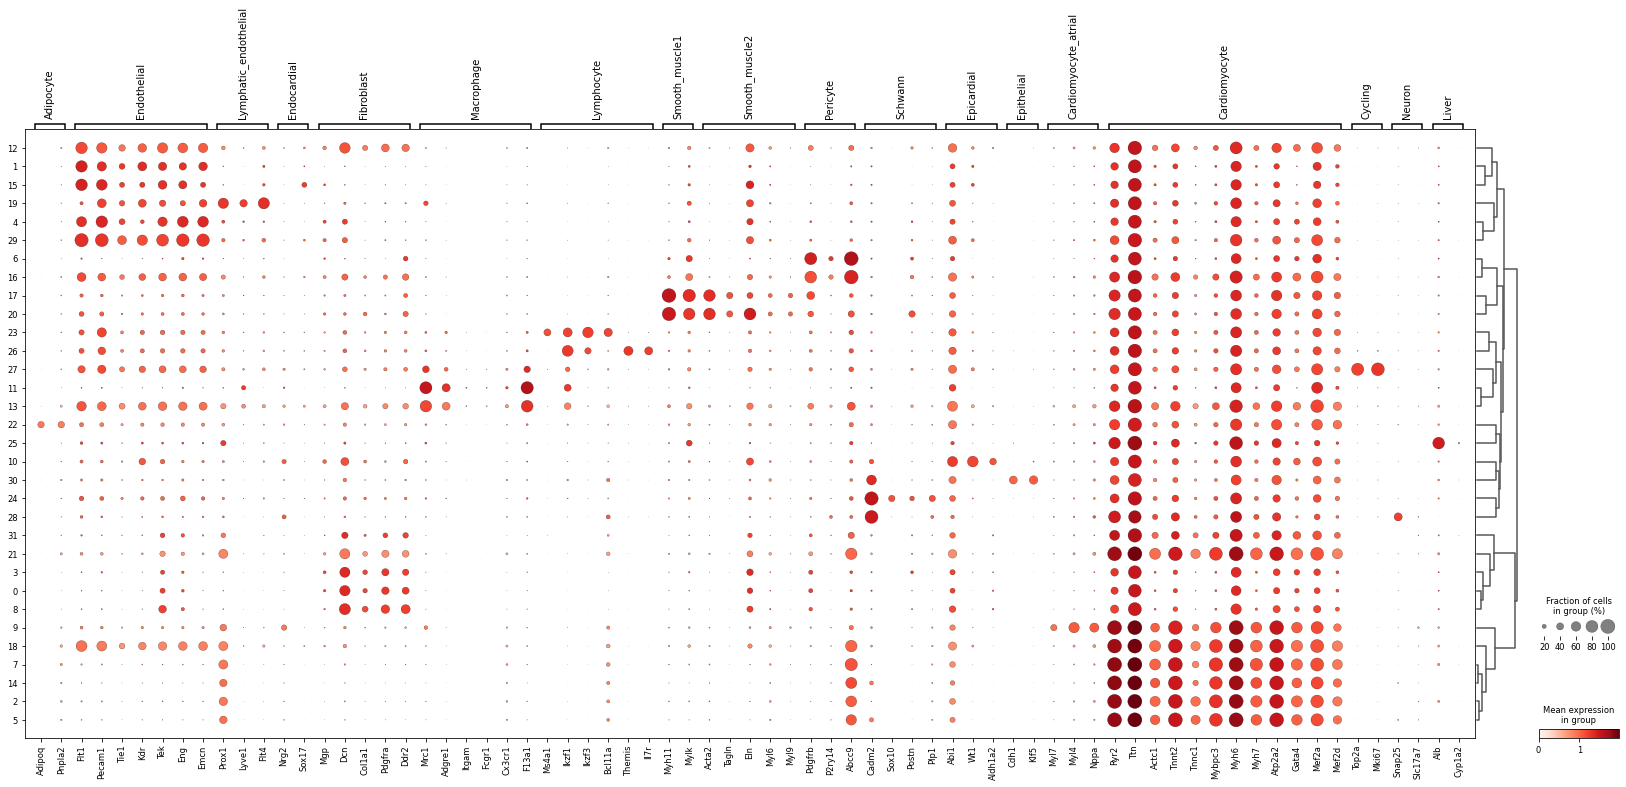

In [59]:
sc.pl.dotplot(adata, marker_genes_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)


In [60]:
smol_marker_genes_dict = {
    "Adipocyte": ["Adipoq"],
    "Endothelial": ["Flt1","Pecam1"],
    "Lymphatic_endothelial": ["Prox1"],
    "Endocardial": ["Sox17"],
    "Fibroblast": ["Dcn","Pdgfra"],
    "Macrophage": ["F13a1"],
    "B_cell": ["Bcl11a"],
    "T_cell": ["Themis"],
    "Smooth_muscle1": ["Myh11","Mylk"],
    "Smooth_muscle2": ["Eln","Tagln"],
    "Pericyte": ["Pdgfrb","P2ry14"],
    "Schwann1": ["Mpz", "Pmp22", "Prx"], # myelinating
    "Schwann2": ["Scn7a","Ncam1","Slc35f1"], # non-myelinating
    "Epicardial": ["Wt1","Aldh1a2"],
    "Epithelial": ["Cdh1","Klf5"],
    "Cardiomyocyte_atrial": ['Myl7','Myl4','Nppa'],
    "Cardiomyocyte": ["Ryr2","Tnnt2","Mybpc3","Myh7","Gata4","Mef2d"],
    "Cycling": ["Top2a","Mki67"],
    "Neuron": ["Snap25","Slc17a7"],
    "Liver": ["Alb", "Cyp1a2"],

}


categories: 0, 1, 2, etc.
var_group_labels: Adipocyte, Endothelial, Lymphatic_endothelial, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


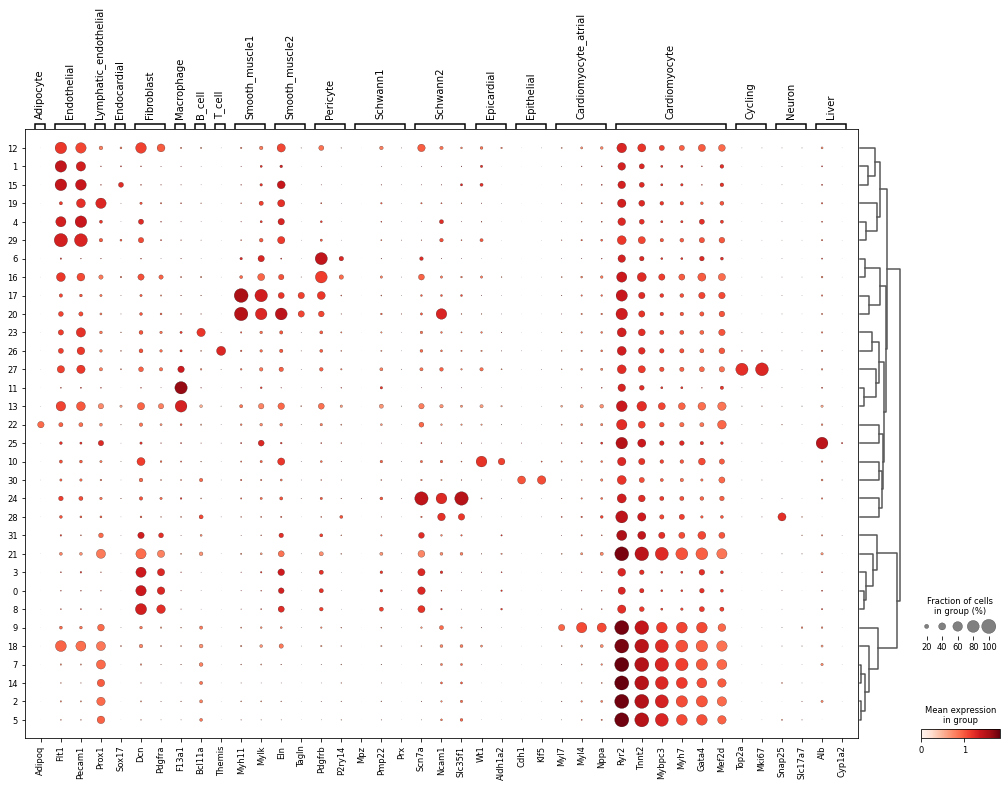

In [61]:
sc.pl.dotplot(adata, smol_marker_genes_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)


# Assign celltypes to clusters

In [7]:
annots = pd.read_csv("Heart_annotations.csv")
annots['leiden'] = annots['leiden'].astype(str)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['general_celltype'].to_dict()
adata.obs['general_celltype'] = adata.obs['leiden'].map(annotation_dict)
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['general_CL_ID'].to_dict()
adata.obs['general_CL_ID'] = adata.obs['leiden'].map(annotation_dict)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['celltype'].to_dict()
adata.obs['celltype'] = adata.obs['leiden'].map(annotation_dict)
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['CL_ID'].to_dict()
adata.obs['CL_ID'] = adata.obs['leiden'].map(annotation_dict)

annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['subtype'].to_dict()
adata.obs['subtype'] = adata.obs['leiden'].map(annotation_dict)



/tmp/ipykernel_1669516/1762110929.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['general_celltype'] = adata.obs['leiden'].map(annotation_dict)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


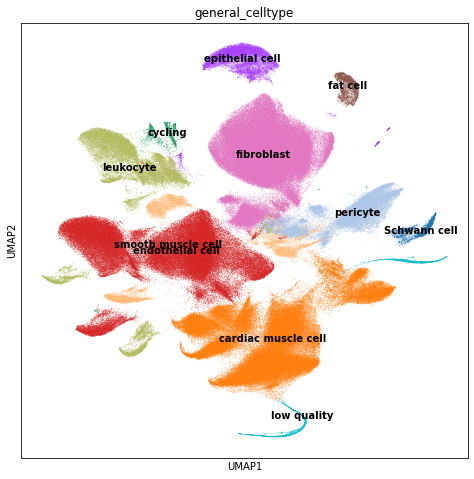

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


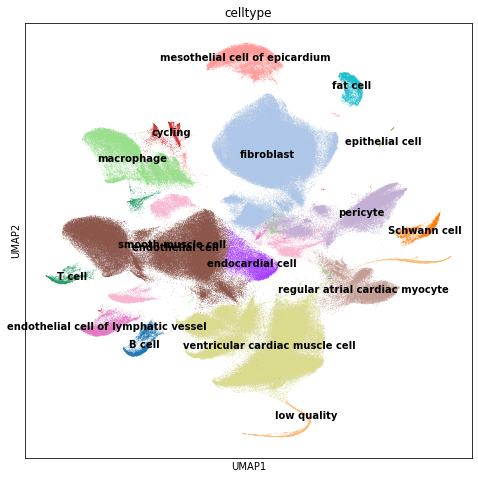

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


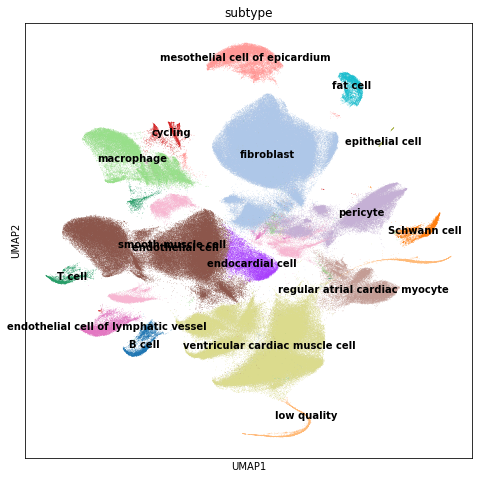

In [9]:
plt.rcParams['figure.figsize'] = (8, 8)

sc.pl.umap(adata, color=['general_celltype'], size=1, legend_loc = 'on data')
sc.pl.umap(adata, color=['celltype'], size=1, legend_loc = 'on data')
sc.pl.umap(adata, color=['subtype'], size=1, legend_loc = 'on data')


In [10]:
sc.tl.dendrogram(adata, groupby = 'subtype')

categories: B cell, Schwann cell, T cell, etc.
var_group_labels: Adipocyte, Endothelial, Lymphatic_endothelial, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


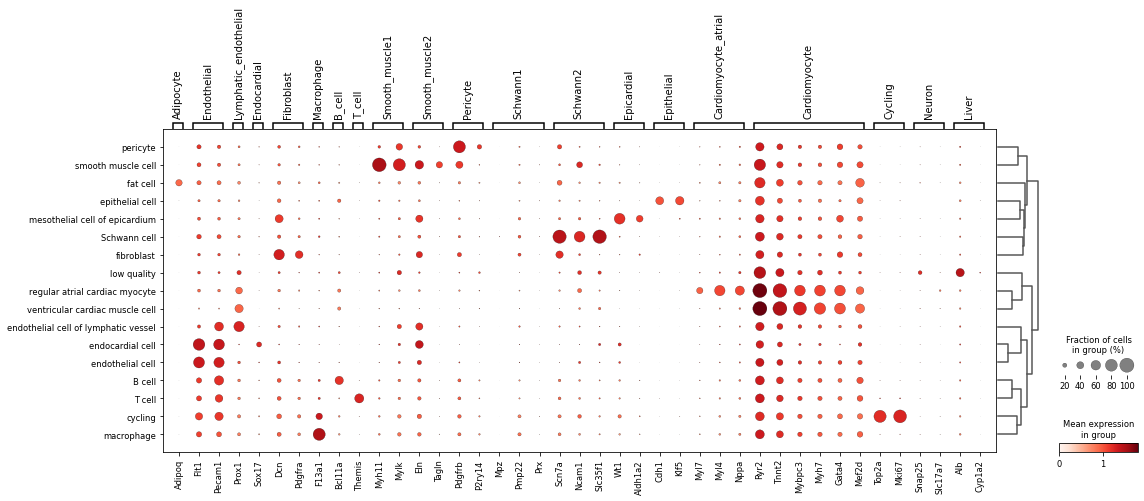

In [13]:
smol_marker_genes_dict = {
    "Adipocyte": ["Adipoq"],
    "Endothelial": ["Flt1","Pecam1"],
    "Lymphatic_endothelial": ["Prox1"],
    "Endocardial": ["Sox17"],
    "Fibroblast": ["Dcn","Pdgfra"],
    "Macrophage": ["F13a1"],
    "B_cell": ["Bcl11a"],
    "T_cell": ["Themis"],
    "Smooth_muscle1": ["Myh11","Mylk"],
    "Smooth_muscle2": ["Eln","Tagln"],
    "Pericyte": ["Pdgfrb","P2ry14"],
    "Schwann1": ["Mpz", "Pmp22", "Prx"], # myelinating
    "Schwann2": ["Scn7a","Ncam1","Slc35f1"], # non-myelinating
    "Epicardial": ["Wt1","Aldh1a2"],
    "Epithelial": ["Cdh1","Klf5"],
    "Cardiomyocyte_atrial": ['Myl7','Myl4','Nppa'],
    "Cardiomyocyte": ["Ryr2","Tnnt2","Mybpc3","Myh7","Gata4","Mef2d"],
    "Cycling": ["Top2a","Mki67"],
    "Neuron": ["Snap25","Slc17a7"],
    "Liver": ["Alb", "Cyp1a2"],

}
adata.var_names  = adata.var['gene_name']


sc.pl.dotplot(adata, smol_marker_genes_dict, 'subtype', mean_only_expressed = True,
              dendrogram=True, log=True)


# Save annotated adata

In [15]:
adata.write_h5ad('../IGVF_analysis/annotated_tissues/Heart_annotated.h5ad')


In [14]:
meta = adata.obs
meta.to_csv(f"../IGVF_analysis/annotated_tissues/Heart_annotated_metadata.csv")


# Pseudobulk PCA

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import decoupler as dc
import anndata
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [3]:
tissue = "Heart"
adata = sc.read(f"../IGVF_analysis/annotated_tissues/{tissue}_annotated.h5ad")
adata = adata[(adata.obs['Genotype'] != "tie")]
adata = adata[~adata.obs['celltype'].isin(["low quality"])]


In [4]:
adata.obs['Mouse_Tissue_ID'] = adata.obs['Mouse_Tissue_ID'].astype(str)


/tmp/ipykernel_3426013/2200752215.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Mouse_Tissue_ID'] = adata.obs['Mouse_Tissue_ID'].astype(str)


In [5]:
# adjust mouse_tissue_id
ms1 = ['B6J','AJ','WSBJ','129S1J']
ms2 = ['NODJ','PWKJ','NZOJ','CASTJ']

# Define a function to update 'Mouse_Tissue_ID' based on conditions
def update_mouse_tissue_id(row):
    if row['plate'] != 'igvf_012' and row['Column'] in [9, 10, 11, 12]:
        if row['Genotype'] in ms1:
            return row['Multiplexed_sample1']
        elif row['Genotype'] in ms2:
            return row['Multiplexed_sample2']
    return row['Mouse_Tissue_ID']

meta = adata.obs

# Apply the function to update the 'Mouse_Tissue_ID' column
meta['Mouse_Tissue_ID'] = meta.apply(update_mouse_tissue_id, axis=1)
adata.obs['Mouse_Tissue_ID'] = meta['Mouse_Tissue_ID']



In [6]:
import decoupler as dc

pdata = dc.get_pseudobulk(
    adata,
    sample_col='Mouse_Tissue_ID',
    groups_col=None,
    obs=adata.obs,
    layer='raw_counts',
    mode='sum',
    min_cells=10,
    min_counts=10000
)


In [7]:
for c in pdata.obs.columns:
        if pd.api.types.is_object_dtype(pdata.obs[c].dtype):
            pdata.obs[c] = pdata.obs[c].fillna('NA')

In [8]:
pdata.write_h5ad(f'../IGVF_analysis/pseudobulk/{tissue}_pseudobulk_raw.h5ad')


In [9]:
sc.pp.normalize_total(pdata, target_sum=1e4) # Counts per 10k
sc.pp.log1p(pdata)

sc.tl.pca(pdata, svd_solver='arpack', use_highly_variable = False)



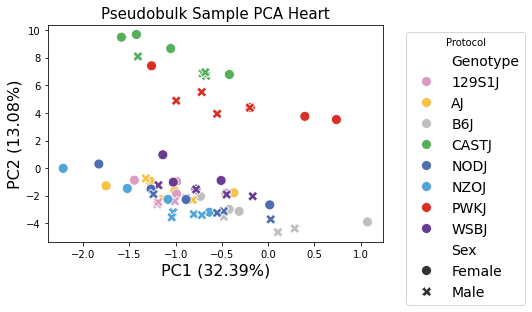

In [13]:
df = pd.DataFrame(pdata.obsm["X_pca"])
meta  = pdata.obs
df.set_index(meta['Mouse_Tissue_ID'], inplace=True)
merged_df = pd.merge(df, meta, left_index=True, right_on='Mouse_Tissue_ID')
merged_df_filt = merged_df.drop(index='031_AJ_10M_06')


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

geno_palette = ['#DA9CC1', '#F4C245', '#C0BFBF', '#55AF5B', '#4F6EAF', '#52A5DB', '#D83026', '#683C91']


sns.scatterplot(x=merged_df_filt.iloc[:, 0], y=merged_df_filt.iloc[:, 1], 
                hue=merged_df_filt['Genotype'], 
                style=merged_df_filt['Sex'], 
                s=100, 
                palette=geno_palette,
                alpha=1)  # Adjust transparency if needed

plt.xlabel("PC1", fontsize=16)
plt.ylabel("PC2", fontsize=16)
plt.title(f'Pseudobulk Sample PCA {tissue}', fontsize=15)

plt.legend(title='Protocol', fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
pc1 = pdata.uns["pca"]["variance_ratio"][0]
pc2 = pdata.uns["pca"]["variance_ratio"][1]
plt.xlabel(f"PC1 ({pc1:.2%})", fontsize=16)
plt.ylabel(f"PC2 ({pc2:.2%})", fontsize=16)


plt.show()


# Pseudobulk subtype expression

In [1]:
import scanpy as sc
import decoupler as dc
import pandas as pd


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
tissue = "Heart"

In [2]:

adata = sc.read(f"../IGVF_analysis/tissue_processed_500umi/{tissue}_processed.h5ad")


In [5]:
meta = pd.read_csv(f"../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv")


/tmp/ipykernel_2002148/1870243520.py:1: DtypeWarning: Columns (11,21,22,23,31,36,37,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f"../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv")


(503665, 57)

In [3]:
meta = pd.read_csv(f"../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv")
cell_mapper = dict(zip(meta['cellID'], meta['subtype']))

adata.obs['subtype'] = adata.obs.index.map(cell_mapper)
mask = ~adata.obs['subtype'].isna()
adata = adata[mask]


/tmp/ipykernel_3363799/204417760.py:1: DtypeWarning: Columns (11,21,22,23,31,35,36,37,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f"../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv")


In [4]:
pdata = dc.get_pseudobulk(
    adata,
    sample_col="subtype",
    groups_col=None,
    obs=adata.obs,
    layer='raw_counts',
    mode='sum',
    min_cells=10,
    min_counts=10000
)

for c in pdata.obs.columns:
        if pd.api.types.is_object_dtype(pdata.obs[c].dtype):
            pdata.obs[c] = pdata.obs[c].fillna('NA')
            
pdata.write_h5ad(f'../IGVF_analysis/pseudobulk/{tissue}_pseudobulk_subtype_sum.h5ad')


In [5]:
pdata = dc.get_pseudobulk(
    adata,
    sample_col="subtype",
    groups_col=None,
    obs=adata.obs,
    layer='raw_counts',
    mode='median',
    min_cells=10,
    min_counts=10000
)

for c in pdata.obs.columns:
        if pd.api.types.is_object_dtype(pdata.obs[c].dtype):
            pdata.obs[c] = pdata.obs[c].fillna('NA')
            
pdata.write_h5ad(f'../IGVF_analysis/pseudobulk/{tissue}_pseudobulk_subtype_median.h5ad')


In [6]:
pdata = dc.get_pseudobulk(
    adata,
    sample_col="subtype",
    groups_col=None,
    obs=adata.obs,
    layer='raw_counts',
    mode='mean',
    min_cells=10,
    min_counts=10000
)

for c in pdata.obs.columns:
        if pd.api.types.is_object_dtype(pdata.obs[c].dtype):
            pdata.obs[c] = pdata.obs[c].fillna('NA')
            

pdata.write_h5ad(f'../IGVF_analysis/pseudobulk/{tissue}_pseudobulk_subtype_mean.h5ad')
